In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_data = pd.read_csv('SalaryData_Train(1).csv')
test_data = pd.read_csv('SalaryData_Test(1).csv')

In [3]:
train_data.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
test_data.head(6)

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
5,63,Self-emp-not-inc,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K


In [5]:
print("Train Data Shape:", train_data.shape)
print("Test Data Shape:", test_data.shape)

Train Data Shape: (30161, 14)
Test Data Shape: (15060, 14)


In [6]:
print("Training Data Info:")
print(train_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB
None


In [7]:
print("Test Data Info:")
print(test_data.info())

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15060 entries, 0 to 15059
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            15060 non-null  int64 
 1   workclass      15060 non-null  object
 2   education      15060 non-null  object
 3   educationno    15060 non-null  int64 
 4   maritalstatus  15060 non-null  object
 5   occupation     15060 non-null  object
 6   relationship   15060 non-null  object
 7   race           15060 non-null  object
 8   sex            15060 non-null  object
 9   capitalgain    15060 non-null  int64 
 10  capitalloss    15060 non-null  int64 
 11  hoursperweek   15060 non-null  int64 
 12  native         15060 non-null  object
 13  Salary         15060 non-null  object
dtypes: int64(5), object(9)
memory usage: 1.6+ MB
None


In [8]:
print("Check for NaN value in Train Data:\n",train_data.isna().sum())

Check for NaN value in Train Data:
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [9]:
print("Check for NaN value in Test Data:\n",test_data.isna().sum())

Check for NaN value in Test Data:
 age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64


In [10]:
print("Statistics for Training Data:\n")
print(train_data.describe())

Statistics for Training Data:

                age   educationno   capitalgain   capitalloss  hoursperweek
count  30161.000000  30161.000000  30161.000000  30161.000000  30161.000000
mean      38.438115     10.121316   1092.044064     88.302311     40.931269
std       13.134830      2.550037   7406.466611    404.121321     11.980182
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       47.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   4356.000000     99.000000


In [11]:
print("Statistics for Test Data:\n")
print(test_data.describe())

Statistics for Test Data:

                age   educationno   capitalgain   capitalloss  hoursperweek
count  15060.000000  15060.000000  15060.000000  15060.000000  15060.000000
mean      38.768327     10.112749   1120.301594     89.041899     40.951594
std       13.380676      2.558727   7703.181842    406.283245     12.062831
min       17.000000      1.000000      0.000000      0.000000      1.000000
25%       28.000000      9.000000      0.000000      0.000000     40.000000
50%       37.000000     10.000000      0.000000      0.000000     40.000000
75%       48.000000     13.000000      0.000000      0.000000     45.000000
max       90.000000     16.000000  99999.000000   3770.000000     99.000000


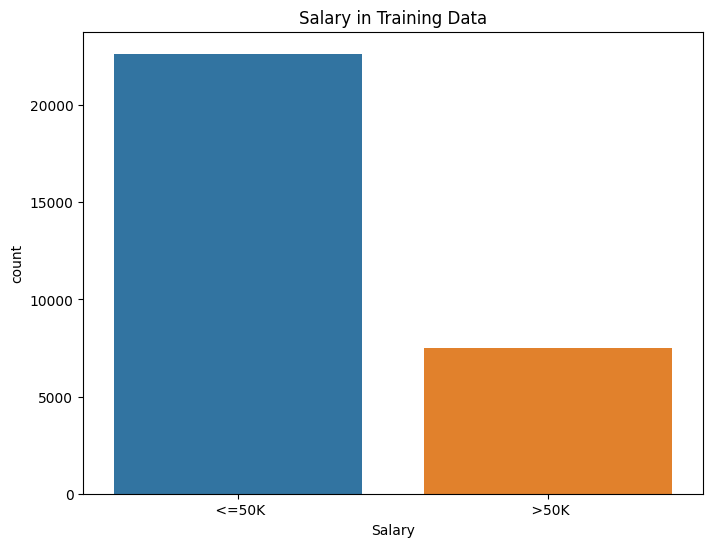

In [12]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary', data=train_data)
plt.title('Salary in Training Data')
plt.show()

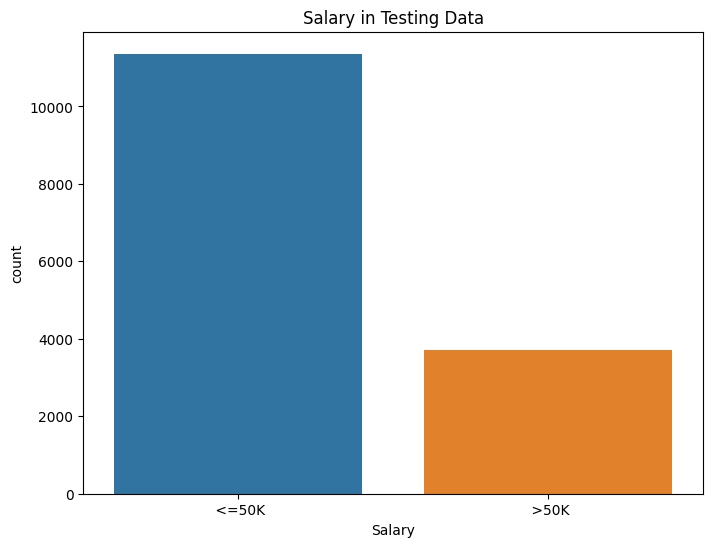

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Salary', data=test_data)
plt.title('Salary in Testing Data')
plt.show()

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

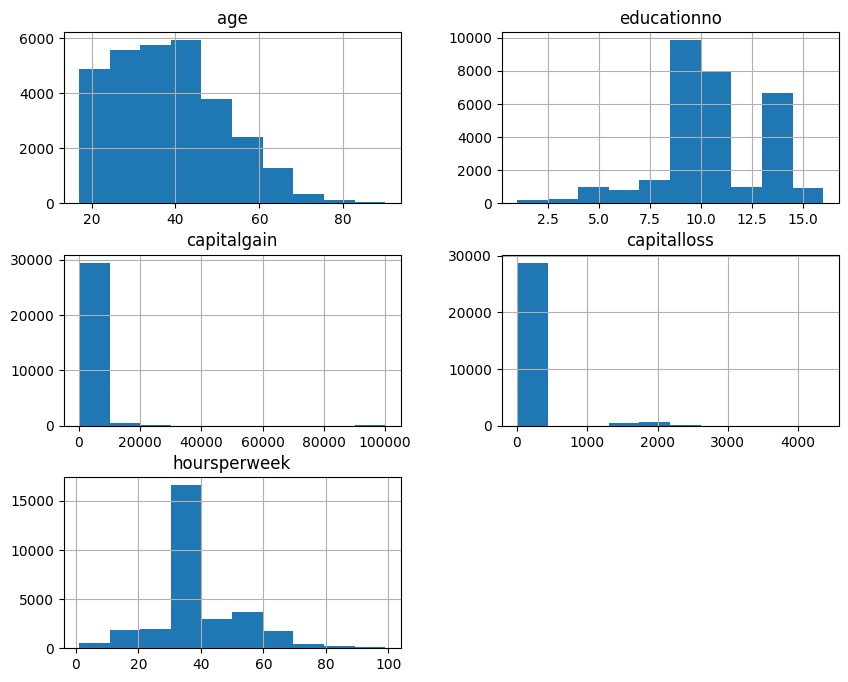

In [14]:
train_data.hist(figsize=(10,8))

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'educationno'}>],
       [<Axes: title={'center': 'capitalgain'}>,
        <Axes: title={'center': 'capitalloss'}>],
       [<Axes: title={'center': 'hoursperweek'}>, <Axes: >]], dtype=object)

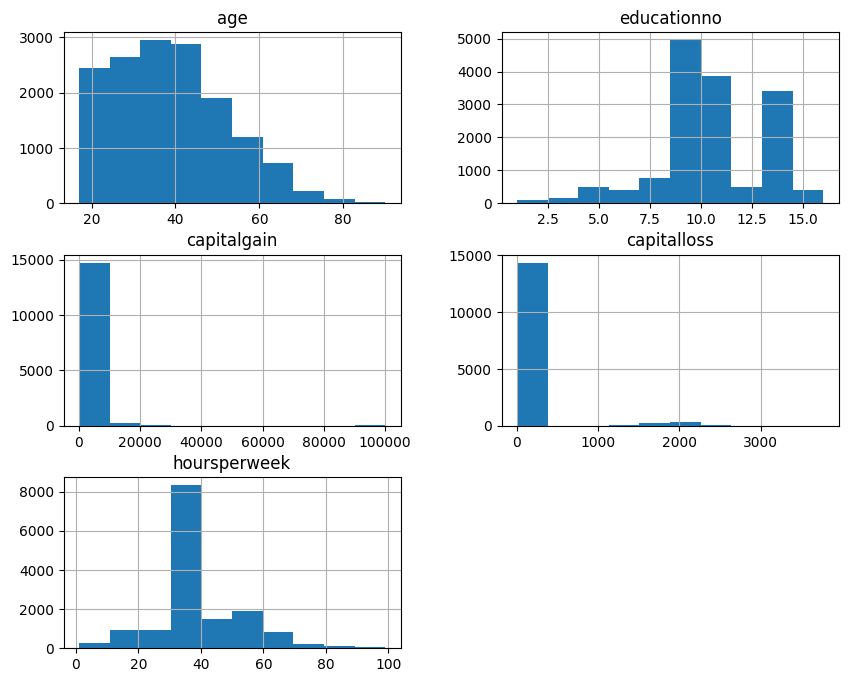

In [15]:
test_data.hist(figsize=(10,8))

In [16]:
n_features = ['age', 'educationno','capitalgain','capitalloss','hoursperweek']

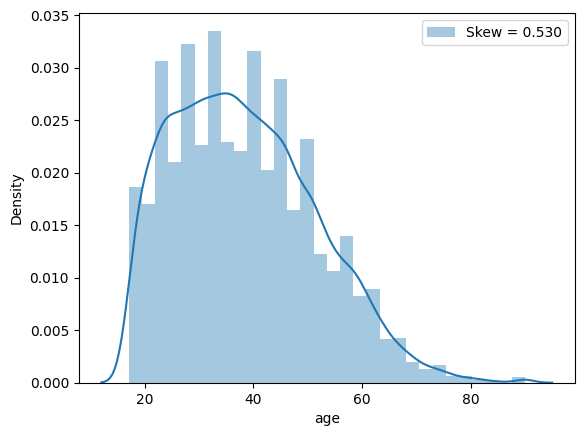

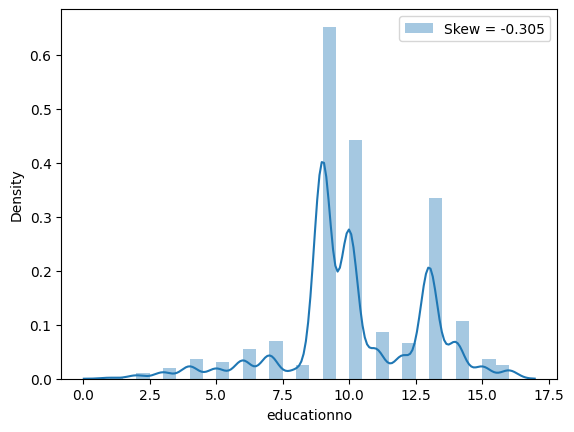

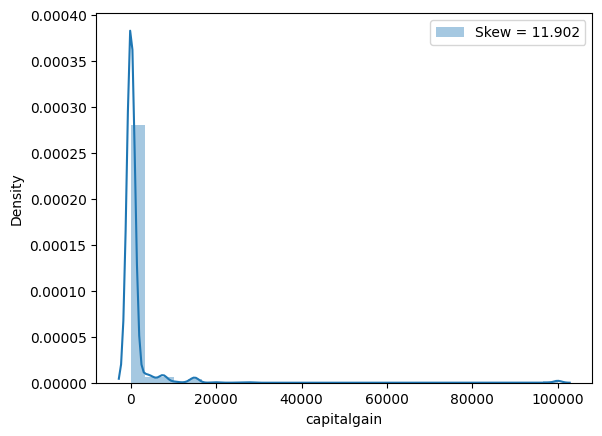

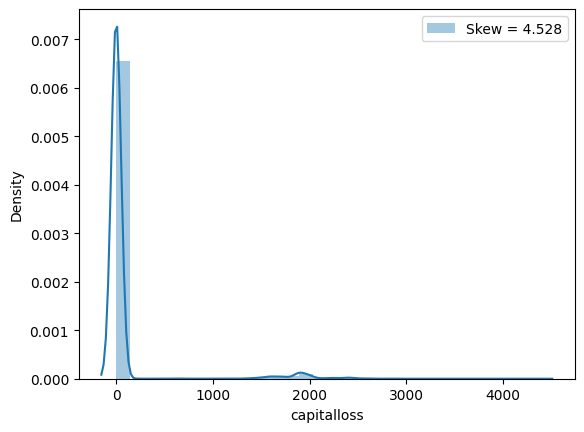

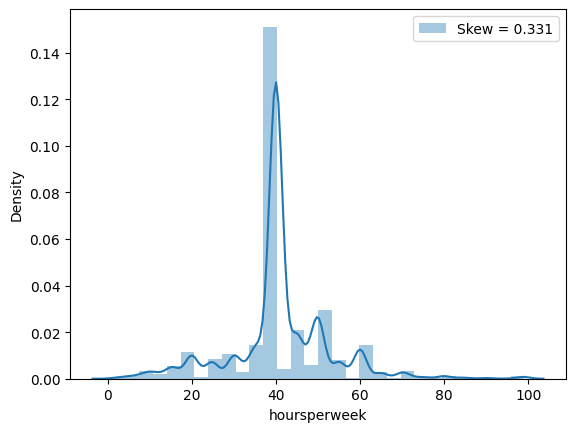

In [17]:
for feat in n_features:
    skew = train_data[feat].skew()
    sns.distplot(train_data[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

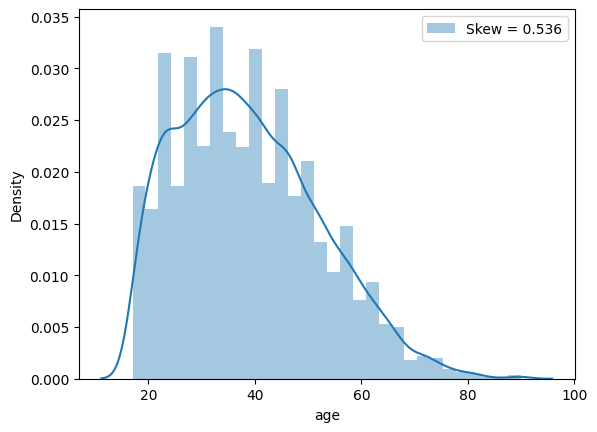

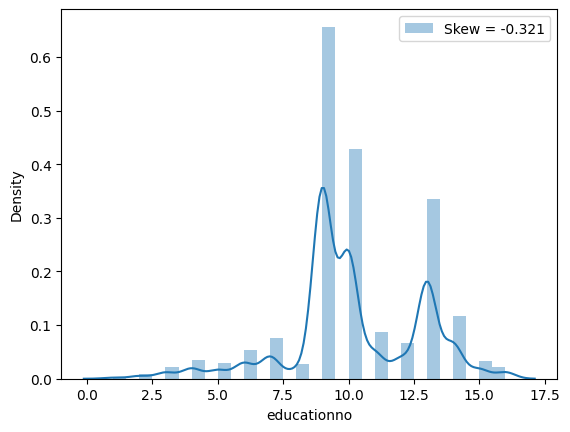

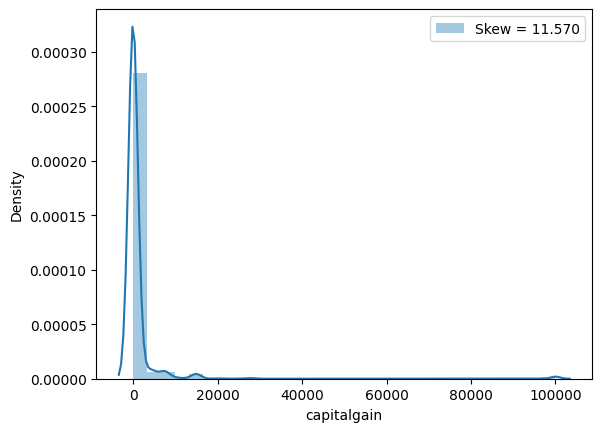

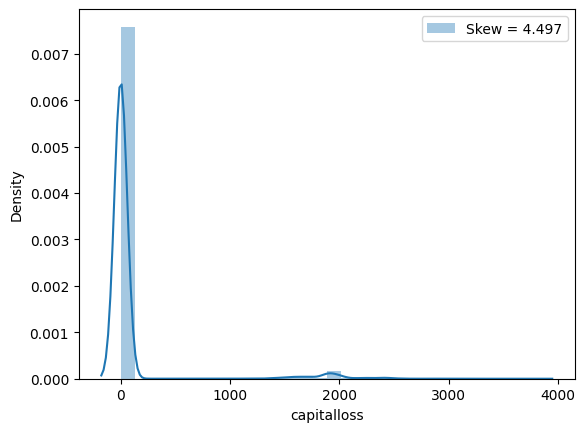

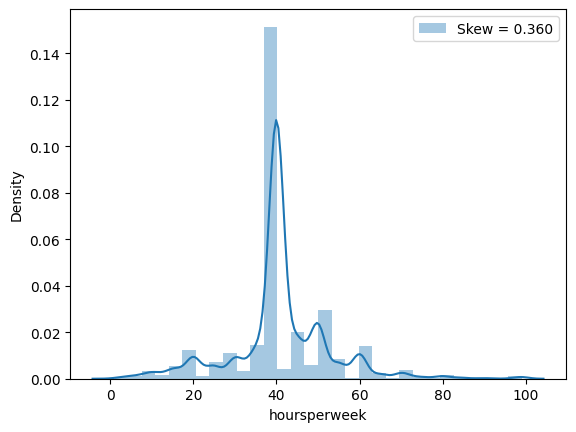

In [18]:
for feat in n_features:
    skew = test_data[feat].skew()
    sns.distplot(test_data[feat], kde= True, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

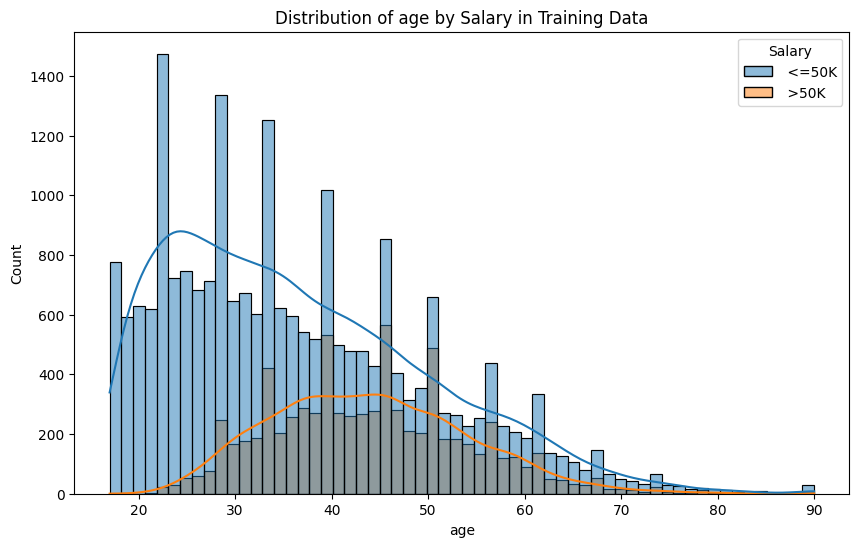

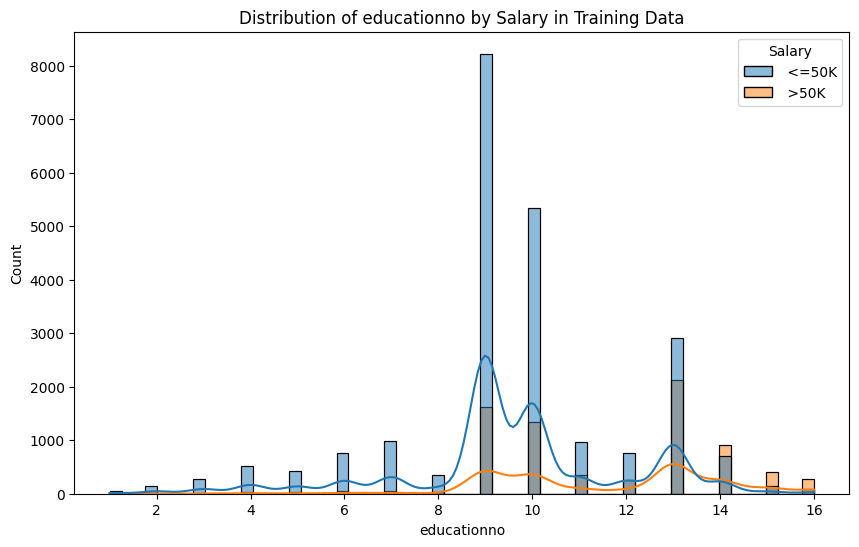

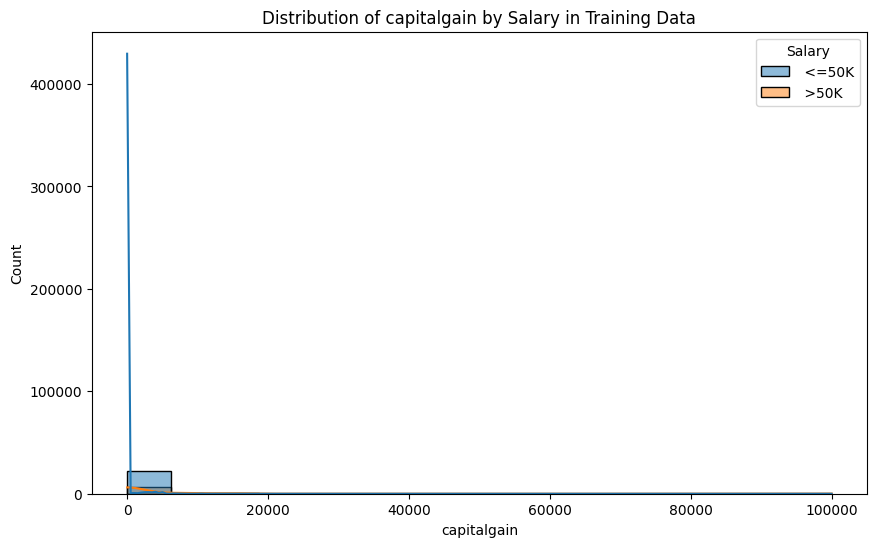

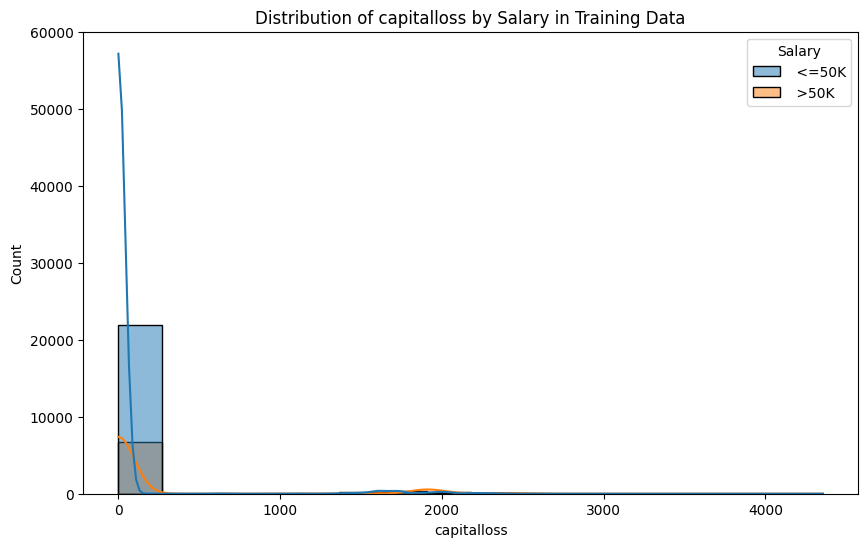

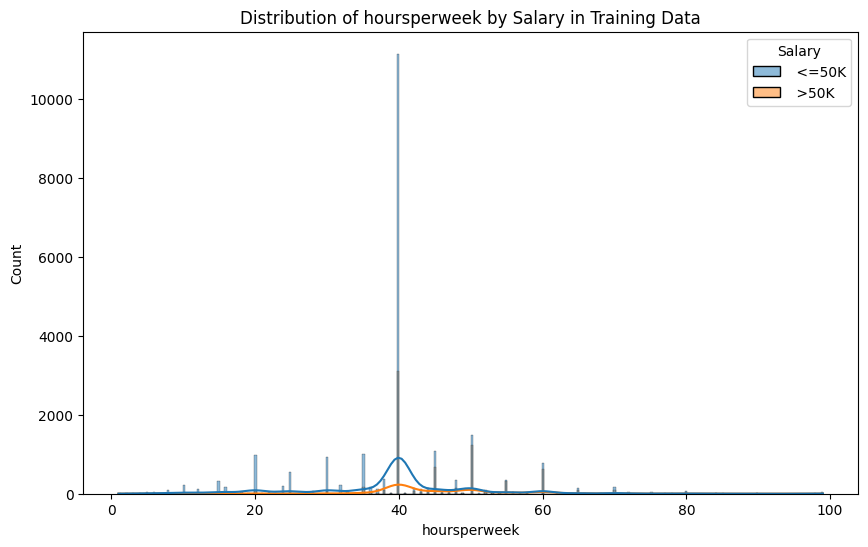

In [19]:
for feature in n_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=feature, data=train_data, hue='Salary', kde=True)
    plt.title(f'Distribution of {feature} by Salary in Training Data')
    plt.show()

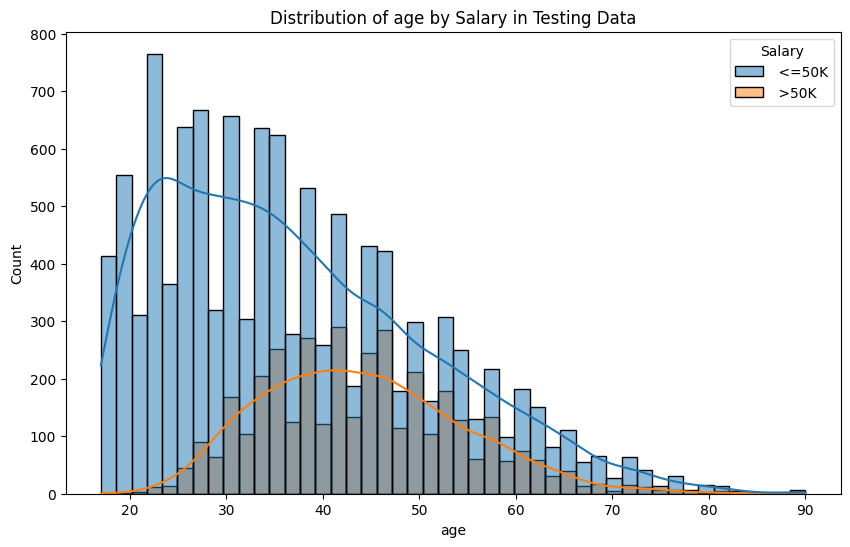

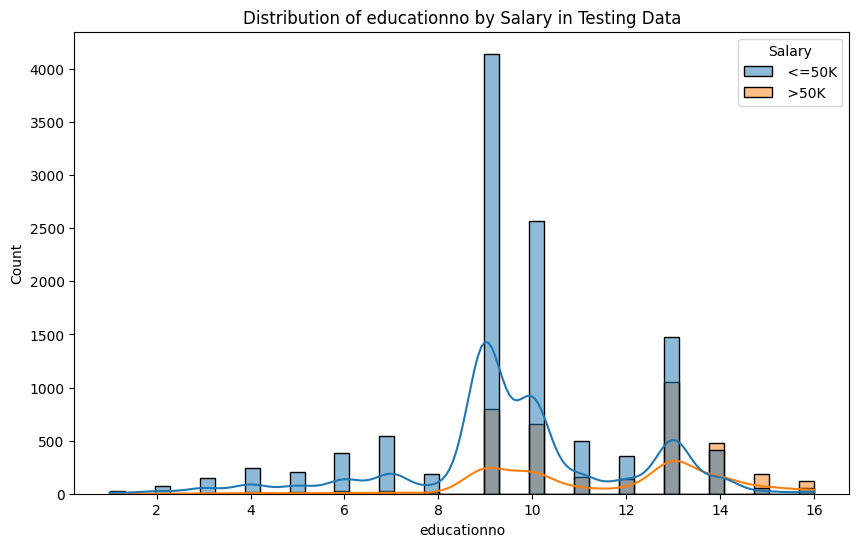

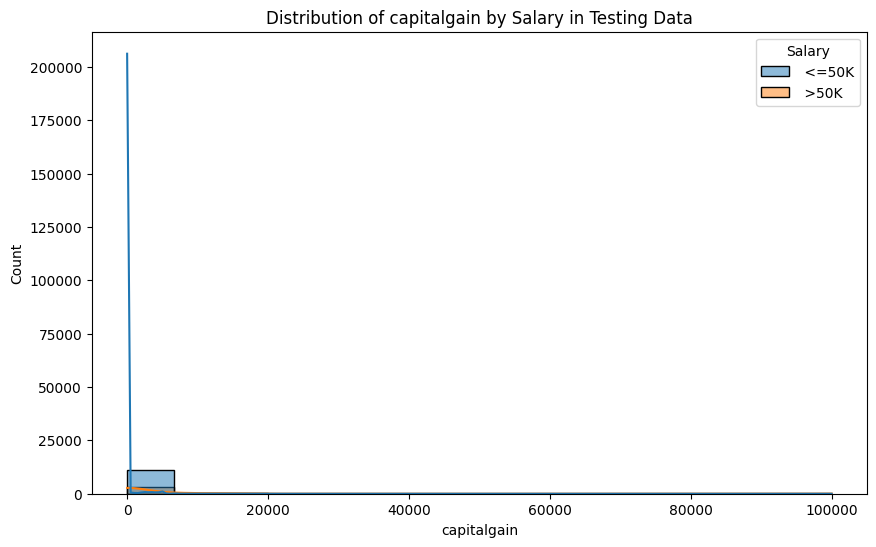

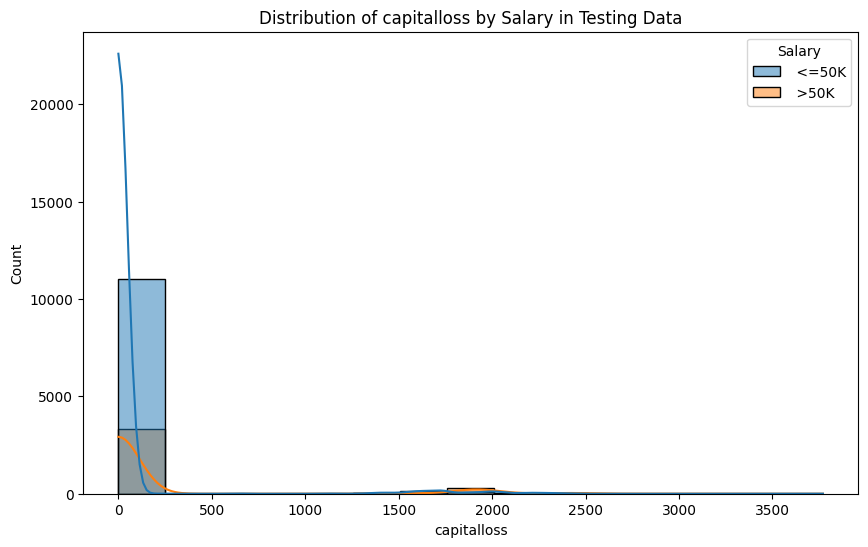

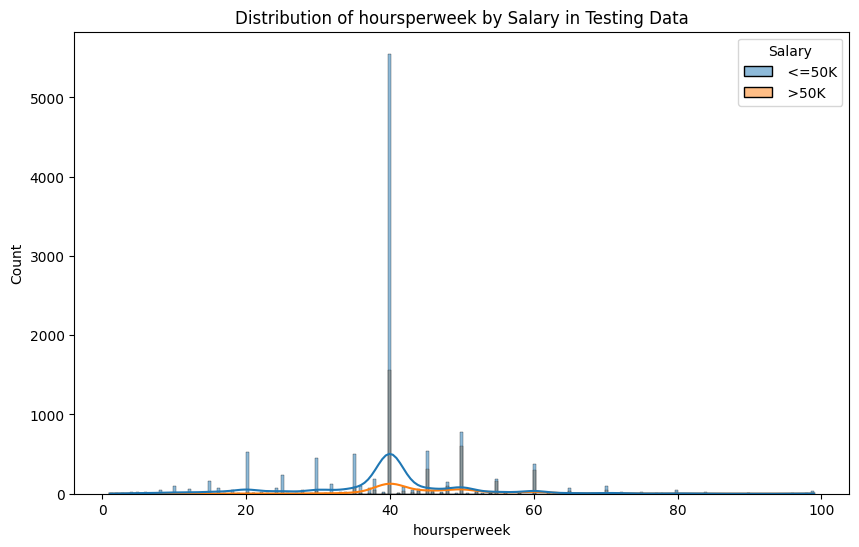

In [20]:
for feature in n_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(x=feature, data=test_data, hue='Salary', kde=True)
    plt.title(f'Distribution of {feature} by Salary in Testing Data')
    plt.show()

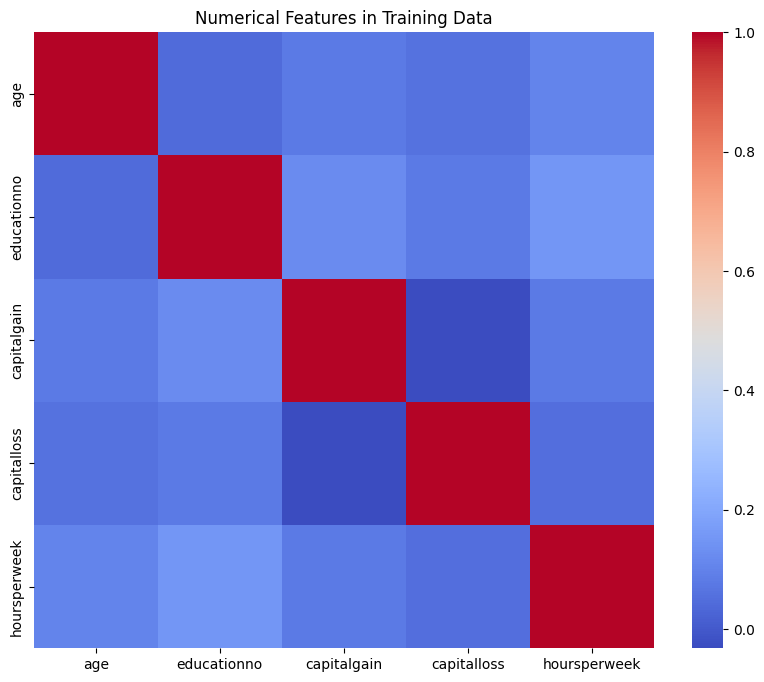

In [21]:
corr = train_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Features in Training Data')
plt.show()

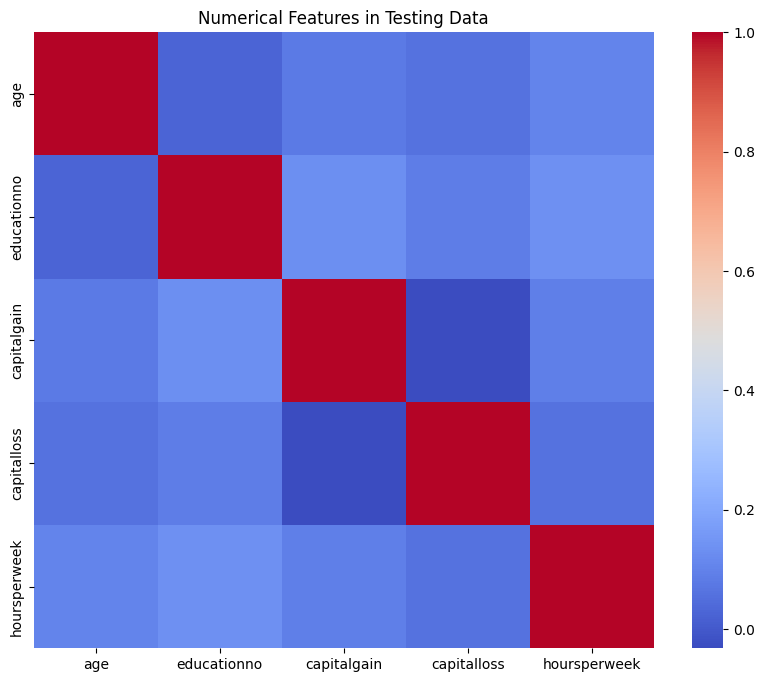

In [22]:
corr = test_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap='coolwarm', fmt=".2f")
plt.title('Numerical Features in Testing Data')
plt.show()

In [23]:
columns_names=["workclass","education","maritalstatus","occupation","relationship","race","sex","native","Salary"]

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in columns_names:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

colnames = train_data.columns

In [25]:
mapping = {' >50K': 1, ' <=50K': 2}

In [26]:
train_data['Salary'].unique()

array([0, 1])

In [27]:
train_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,0
1,50,4,9,13,2,3,0,4,1,0,0,13,37,0
2,38,2,11,9,0,5,1,4,1,0,0,40,37,0
3,53,2,1,7,2,5,0,2,1,0,0,40,37,0
4,28,2,9,13,2,9,5,2,0,0,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,0
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,1
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,0
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,0


In [28]:
test_data

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,0
1,38,2,11,9,2,4,0,4,1,0,0,50,37,0
2,28,1,7,12,2,10,0,4,1,0,0,40,37,1
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,1
4,34,2,0,6,4,7,1,4,1,0,0,30,37,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,0
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,0
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,0
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,0


In [29]:
x_train = train_data.drop("Salary", axis=1)
y_train = train_data["Salary"]

x_test = test_data.drop("Salary", axis=1)
y_test = test_data["Salary"]

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(30161, 13)
(15060, 13)
(30161,)
(15060,)


In [31]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [32]:
x_train = norm_func(x_train)
x_test =  norm_func(x_test)
y_train = y_train
y_test = y_test

In [33]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score ,confusion_matrix

In [34]:
# Check Accuracy for Linear Kernel

In [35]:
model_linear = SVC(kernel = "linear")
model_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [36]:
yp_test_linear = model_linear.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, yp_test_linear)*100)

Accuracy: 80.98273572377158


In [37]:
# Check Accuracy for RBF Kernel

In [38]:
model_rbf = SVC(kernel = "rbf")
model_rbf.fit(x_train,y_train)

SVC()

In [39]:
yp_test_rbf = model_rbf.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, yp_test_rbf)*100)

Accuracy: 84.32934926958832


In [40]:
# Check Accuracy for Poly Kernel

In [41]:
model_poly = SVC(kernel = "poly")
model_poly.fit(x_train,y_train)

SVC(kernel='poly')

In [42]:
yp_test_poly = model_poly.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, yp_test_poly)*100)

Accuracy: 84.35590969455511


In [43]:
# Check Accuracy for Sigmoid Kernel

In [44]:
model_sigmoid = SVC(kernel = "sigmoid")
model_sigmoid.fit(x_train,y_train)

SVC(kernel='sigmoid')

In [45]:
yp_test_sigmoid = model_sigmoid.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, yp_test_sigmoid)*100)

Accuracy: 57.68924302788845


In [46]:
# Poly Kernel has the Highest Accuracy

In [48]:
print("Accuracy for Poly Kernel:",metrics.accuracy_score(y_test, yp_test_poly)*100)
print("Clasification:\n",classification_report(y_test,yp_test_poly))

Accuracy for Poly Kernel: 84.35590969455511
Clasification:
               precision    recall  f1-score   support

           0       0.87      0.94      0.90     11360
           1       0.74      0.56      0.64      3700

    accuracy                           0.84     15060
   macro avg       0.80      0.75      0.77     15060
weighted avg       0.84      0.84      0.84     15060



[[10626   734]
 [ 1622  2078]]


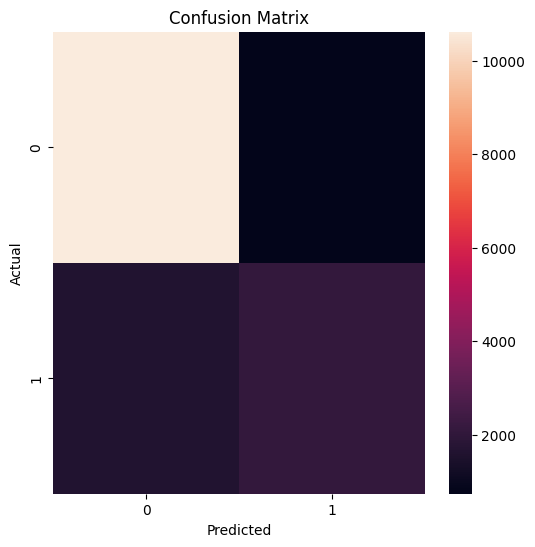

In [49]:
cm = confusion_matrix(y_test,yp_test_poly)
print(cm)
plt.figure(figsize=(6, 6))
sns.heatmap(cm)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()